In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
data = pd.read_csv('data/CommViolPredUnnormalizedData.csv', na_values=["?"])
data.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


In [3]:
data.shape

(2215, 147)

In [4]:
data.drop(['communityname','state', 'countyCode', 'communityCode', 'fold'], axis=1, inplace=True)

In [5]:
data.columns

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up',
       ...
       'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
       'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop'],
      dtype='object', length=142)

In [6]:
data.isnull().any()

population             False
householdsize          False
racepctblack           False
racePctWhite           False
racePctAsian           False
racePctHisp            False
agePct12t21            False
agePct12t29            False
agePct16t24            False
agePct65up             False
numbUrban              False
pctUrban               False
medIncome              False
pctWWage               False
pctWFarmSelf           False
pctWInvInc             False
pctWSocSec             False
pctWPubAsst            False
pctWRetire             False
medFamInc              False
perCapInc              False
whitePerCap            False
blackPerCap            False
indianPerCap           False
AsianPerCap            False
OtherPerCap             True
HispPerCap             False
NumUnderPov            False
PctPopUnderPov         False
PctLess9thGrade        False
                       ...  
OfficAssgnDrugUnits     True
NumKindsDrugsSeiz       True
PolicAveOTWorked        True
LandArea      

In [6]:
data.isnull().sum()

population                0
householdsize             0
racepctblack              0
racePctWhite              0
racePctAsian              0
racePctHisp               0
agePct12t21               0
agePct12t29               0
agePct16t24               0
agePct65up                0
numbUrban                 0
pctUrban                  0
medIncome                 0
pctWWage                  0
pctWFarmSelf              0
pctWInvInc                0
pctWSocSec                0
pctWPubAsst               0
pctWRetire                0
medFamInc                 0
perCapInc                 0
whitePerCap               0
blackPerCap               0
indianPerCap              0
AsianPerCap               0
OtherPerCap               1
HispPerCap                0
NumUnderPov               0
PctPopUnderPov            0
PctLess9thGrade           0
                       ... 
OfficAssgnDrugUnits    1872
NumKindsDrugsSeiz      1872
PolicAveOTWorked       1872
LandArea                  0
PopDens             

In [7]:
data.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
count,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2124.000000,2124.000000,1994.000000,2118.000000
mean,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,11.836393,...,761.236890,1033.430203,2137.629295,3372.979150,516.692586,473.965628,30.907721,32.153682,589.078922,4908.241804
std,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,6.181517,5.970747,4.777565,...,3111.702756,763.354442,7600.573464,1901.316145,3258.164244,504.666026,180.125248,39.240900,614.784518,2739.708901
min,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,1.660000,...,2.000000,16.920000,10.000000,77.860000,1.000000,6.550000,0.000000,0.000000,0.000000,116.790000
25%,1.436600e+04,2.500000,0.860000,76.320000,0.620000,0.930000,12.250000,24.415000,11.320000,8.750000,...,95.000000,511.690000,392.000000,2040.080000,30.000000,156.952500,1.000000,7.670000,161.700000,2918.070000
50%,2.279200e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.540000,11.730000,...,205.000000,822.715000,747.000000,3079.510000,75.000000,302.355000,5.000000,21.080000,374.060000,4425.450000
75%,4.302400e+04,2.850000,11.145000,96.225000,2.670000,7.810000,15.360000,29.205000,14.345000,14.415000,...,508.000000,1350.232500,1675.000000,4335.410000,232.500000,589.775000,16.000000,42.852500,794.400000,6229.280000
max,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,52.770000,...,99207.000000,11881.020000,235132.000000,25910.550000,112464.000000,4968.590000,5119.000000,436.370000,4877.060000,27119.760000


In [8]:
# horizontal drop na from nonViolPerPop
data = data[~data.nonViolPerPop.isnull()]

In [9]:
data.nonViolPerPop.isnull().any()

False

In [10]:
clean = data.dropna(axis=1)

In [11]:
clean.shape

(2118, 112)

In [12]:
clean.columns[:100]

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'HispPerCap', 'NumUnderPov',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
       'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ',
       'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr',
       'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids',
       'PctWorkMom', 'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig',
       'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10',
       'PctRecentImmig', 'PctRecImmig5', '

In [13]:
clean.dtypes

population                 int64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                  int64
pctUrban                 float64
medIncome                  int64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                  int64
perCapInc                  int64
whitePerCap                int64
blackPerCap                int64
indianPerCap               int64
AsianPerCap                int64
HispPerCap                 int64
NumUnderPov                int64
PctPopUnderPov           float64
PctLess9thGrade          float64
PctNotHSGrad             float64
          

In [14]:
clean.isnull().sum()

population               0
householdsize            0
racepctblack             0
racePctWhite             0
racePctAsian             0
racePctHisp              0
agePct12t21              0
agePct12t29              0
agePct16t24              0
agePct65up               0
numbUrban                0
pctUrban                 0
medIncome                0
pctWWage                 0
pctWFarmSelf             0
pctWInvInc               0
pctWSocSec               0
pctWPubAsst              0
pctWRetire               0
medFamInc                0
perCapInc                0
whitePerCap              0
blackPerCap              0
indianPerCap             0
AsianPerCap              0
HispPerCap               0
NumUnderPov              0
PctPopUnderPov           0
PctLess9thGrade          0
PctNotHSGrad             0
                        ..
RentLowQ                 0
RentMedian               0
RentHighQ                0
RentQrange               0
MedRent                  0
MedRentPctHousInc        0
M

In [16]:
# select the str columns
df_str = clean.select_dtypes(exclude=['int64', 'float64'])
print(df_str)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, ...]

[2118 rows x 0 columns]


In [16]:
# First 100 columns, both percentage and integer values
X = clean.values[:,:100]
print(len(X))
# Percentage of nonViolent Crime
y = clean.values[:,111]
print(len(y))

2118
2118


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearRegression()
kfold = KFold(n_splits=10, random_state=7)

result = cross_val_score(model, X, y, cv=kfold, scoring='r2')
print(result.mean())

0.540033657255


In [22]:
# feature extraction
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Instantiate a SelectKBest object with scoring funcion and how many columns you want to select
skb4 = SelectKBest(score_func=f_regression, k=4)

# Fit your X and y
fit = skb4.fit(X,y)

# To observe scores, zip column names and scores, then sort them in descending order.
feat_list = list(zip(data[:100].columns, skb4.scores_, skb4.pvalues_))
feat_list.sort(key=lambda x: x[2], reverse=False)
pd.DataFrame(feat_list, columns=['feature','f-score','p-value'])

,feature,f-score,p-value
0,PctFam2Par,1716.492336,3.059567e-275
1,PersPerFam,1651.826963,2.038351e-267
2,PctYoungKids2Par,1340.779083,8.422817e-228
3,PctKids2Par,1291.696502,3.172317e-221
4,FemalePctDiv,1226.887755,2.143630e-212
5,MalePctNevMarr,1179.257163,8.522816e-206
6,PctOccupMgmtProf,1106.253579,1.711929e-195
7,NumKidsBornNeverMar,967.485845,3.016903e-175
8,NumUnderPov,779.902666,2.246930e-146
9,PersPerRentOccHous,725.517048,1.186798e-137


In [19]:
X.shape

(2118, 100)

In [24]:
X_skb4 = skb4.transform(X)
X_skb4.shape

(2118, 4)

In [25]:
result = cross_val_score(model, X_skb4, y, cv=kfold, scoring='r2')
print(result.mean())

0.451529292115


In [26]:
mask = skb4.get_support()
print(mask)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


([], <a list of 0 Text yticklabel objects>)

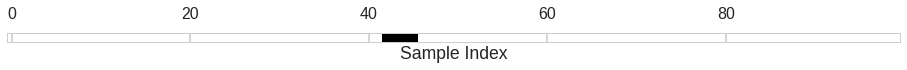

In [27]:
#  black is true, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample Index")
plt.yticks(())

In [28]:
# Instantiate a SelectKBest object with scoring funcion and how many columns you want to select
skb40 = SelectKBest(score_func=f_regression, k=40)

# Fit your X and y
fit40 = skb40.fit(X,y)
X_skb40 = skb40.transform(X)
X_skb40.shape

(2118, 40)

In [29]:
result = cross_val_score(model, X_skb40, y, cv=kfold, scoring='r2')
print(result.mean())

0.505210897934


In [30]:
mask = skb40.get_support()
print(mask)

[False False  True  True False False False False False False False False
  True  True False  True False  True False  True  True False False False
 False  True False  True  True  True  True  True  True False False False
  True  True False  True  True False  True  True  True  True False False
 False  True False False False False  True False False False False False
 False False False False  True False  True False  True  True False  True
  True  True False False  True False  True  True  True False  True  True
  True False  True False False False False False False False False False
 False False False False]


([], <a list of 0 Text yticklabel objects>)

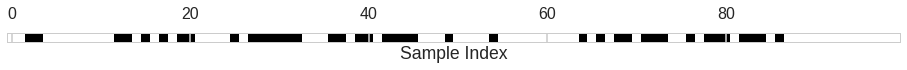

In [31]:
#  black is true, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample Index")
plt.yticks(())

In [32]:
# Instantiate a SelectKBest object with scoring funcion and how many columns you want to select
skb10 = SelectKBest(score_func=f_regression, k=10)

# Fit your X and y
fit10 = skb10.fit(X,y)
X_skb10 = skb10.transform(X)
X_skb10.shape

(2118, 10)

In [33]:
result = cross_val_score(model, X_skb10, y, cv=kfold, scoring='r2')
print(result.mean())

0.478761980687


In [34]:
# Instantiate a SelectKBest object with scoring funcion and how many columns you want to select
skb50 = SelectKBest(score_func=f_regression, k=50)

# Fit your X and y
fit50 = skb50.fit(X,y)
X_skb50 = skb50.transform(X)
X_skb50.shape

(2118, 50)

In [35]:
result = cross_val_score(model, X_skb50, y, cv=kfold, scoring='r2')
print(result.mean())

0.507519713599


# 2. Fit and score a classifier on the full data and skb-transformed data

Shuffle-split cross-validation allows for control over the number of iterations independently of the training and test sizes, which can sometimes be helpful.

In [52]:
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf_params = {
    'n_estimators':[10,100],
    'max_depth':[10,50,None]
}

In [54]:
rf_gs = GridSearchCV(RandomForestRegressor(random_state=42),
                     param_grid= rf_params,
                     cv=ShuffleSplit(n_splits=10,
                                     random_state=42),
                     n_jobs = -1, return_train_score=True)

In [55]:
rf_gs.fit(X, y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size='default',
       train_size=None),
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 100], 'max_depth': [10, 50, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [57]:
orig_results = pd.DataFrame(rf_gs.cv_results_)

orig_results.T

,0,1,2,3,4,5
mean_fit_time,0.889868,7.9102,1.04767,10.1041,0.983677,9.63231
mean_score_time,0.00192902,0.0112758,0.0020479,0.0124089,0.00181143,0.0120162
mean_test_score,0.484873,0.545663,0.467633,0.542848,0.467633,0.542848
mean_train_score,0.858563,0.881772,0.904969,0.930077,0.904969,0.930077
param_max_depth,10,10,50,50,None,None
param_n_estimators,10,100,10,100,10,100
params,"{'max_depth': 10, 'n_estimators': 10}","{'max_depth': 10, 'n_estimators': 100}","{'max_depth': 50, 'n_estimators': 10}","{'max_depth': 50, 'n_estimators': 100}","{'max_depth': None, 'n_estimators': 10}","{'max_depth': None, 'n_estimators': 100}"
rank_test_score,4,1,5,2,5,2
split0_test_score,0.550654,0.552032,0.530271,0.551256,0.530271,0.551256
split0_train_score,0.855222,0.883309,0.905231,0.933121,0.905231,0.933121


In [58]:
rf_gs.fit(X_skb, y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size='default',
       train_size=None),
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 100], 'max_depth': [10, 50, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [59]:
skb_results = pd.DataFrame(rf_gs.cv_results_)

skb_results.T

,0,1,2,3,4,5
mean_fit_time,0.0735127,0.462523,0.058019,0.578924,0.058906,0.560526
mean_score_time,0.00222771,0.0109135,0.00164073,0.0121277,0.00167265,0.0118949
mean_test_score,0.400586,0.42449,0.35627,0.403944,0.35627,0.403944
mean_train_score,0.7706,0.791558,0.885538,0.914544,0.885538,0.914544
param_max_depth,10,10,50,50,None,None
param_n_estimators,10,100,10,100,10,100
params,"{'max_depth': 10, 'n_estimators': 10}","{'max_depth': 10, 'n_estimators': 100}","{'max_depth': 50, 'n_estimators': 10}","{'max_depth': 50, 'n_estimators': 100}","{'max_depth': None, 'n_estimators': 10}","{'max_depth': None, 'n_estimators': 100}"
rank_test_score,4,1,5,2,5,2
split0_test_score,0.449035,0.446771,0.392812,0.421619,0.392812,0.421619
split0_train_score,0.768576,0.792469,0.884528,0.916061,0.884528,0.916061


## Select from model

In [36]:
from sklearn.feature_selection import SelectFromModel

In [39]:
# Instantiate a SelectFromModel object with an estimator (any model with coefs_ or feature_importances_) and 
sfm = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))

# Fit your X and y
sfm.fit(X, y)
X_train_l1 = sfm.transform(X)
print("X.shape: {}".format(X.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X.shape: (2118, 100)
X_train_l1.shape: (2118, 14)


In [40]:
# SelectFromModel has no .scores_ attribute. Instead, let's look at .get_support()
mask = sfm.get_support()
print(mask)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False  True False  True  True False  True  True False  True False False
  True False False False False False False False False False False False
 False False False False False  True False  True False False  True  True
 False False False False False False False False False False  True False
 False False False False False False False  True False False False False
 False False False False]


([], <a list of 0 Text yticklabel objects>)

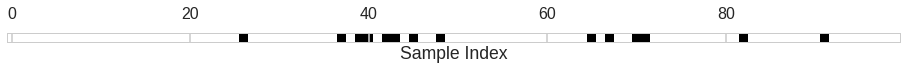

In [41]:
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample Index")
plt.yticks(())

In [42]:
# To observe scores, zip column names and scores, then sort them in descending order.
feat_list_sfm = list(zip(data[:100].columns,sfm.get_support()))
feat_list_sfm.sort(key=lambda x: x[1], reverse=True)
pd.DataFrame(feat_list_sfm, columns=['Feature','support'])

,Feature,support
0,HispPerCap,True
1,PctOccupMgmtProf,True
2,MalePctNevMarr,True
3,FemalePctDiv,True
4,PersPerFam,True
5,PctFam2Par,True
6,PctYoungKids2Par,True
7,PctWorkMom,True
8,PersPerOwnOccHous,True
9,PctPersOwnOccup,True


In [43]:
rf_feat_list = list(zip(data[:100].columns, sfm.estimator_.feature_importances_))
rf_feat_list.sort(key=lambda x: x[1], reverse=True)
pd.DataFrame(rf_feat_list, columns=['feature','importance'])

,feature,importance
0,PctFam2Par,0.349483
1,PersPerFam,0.075918
2,FemalePctDiv,0.030466
3,PctYoungKids2Par,0.029129
4,OwnOccQrange,0.027713
5,PctOccupMgmtProf,0.018202
6,MalePctNevMarr,0.016981
7,NumInShelters,0.016535
8,MedNumBR,0.015696
9,HousVacant,0.014016


In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
display(sfm.estimator_)

display(cross_val_score(sfm.estimator_, X, y, cv=3, n_jobs=-1).mean())

display(cross_val_score(sfm.estimator_, X_train_l1, y, cv=3, n_jobs=-1).mean())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

0.51343727940382078

0.49092177541908022

In [39]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [40]:
display(cross_val_score(Lasso(), X, y, cv=3, n_jobs=-1).mean())

display(cross_val_score(Lasso(), X_sfm_rf, y, cv=3, n_jobs=-1).mean())

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.52428870791328985

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.50328110898168033

In [41]:
enet_params = {
    'alpha':np.logspace(-3,3)
}

In [42]:
enet_gs = GridSearchCV(ElasticNet(), param_grid=enet_params,
                       n_jobs=-1, cv=ShuffleSplit())

In [43]:
enet_gs.fit(X, y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size='default',
       train_size=None),
       error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': array([  1.00000e-03,   1.32571e-03,   1.75751e-03,   2.32995e-03,
         3.08884e-03,   4.09492e-03,   5.42868e-03,   7.19686e-03,
         9.54095e-03,   1.26486e-02,   1.67683e-02,   2.22300e-02,
         2.94705e-02,   3.90694e-02,   5.17947e-02,   6.86649e-02,
         9....    2.44205e+02,   3.23746e+02,   4.29193e+02,   5.68987e+02,
         7.54312e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
sfm_enet = SelectFromModel(enet_gs.best_estimator_, prefit=True)

In [45]:
sfm_enet.get_support()

array([False,  True, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False, False], dtype=bool)

In [46]:
sfm_enet_results = list(zip(data[:100].columns,
                            sfm_enet.estimator.coef_,
                            sfm_enet.get_support()))

sfm_enet_results.sort(key=lambda x: x[1], reverse=True)

In [47]:
sfm_enet_results

[('PctLargHouseOccup', 1581.6788854419606, True),
 ('PersPerOccupHous', 1115.1401352237999, True),
 ('PctRecentImmig', 541.64266766794469, True),
 ('PctOccupMgmtProf', 295.05264424044037, True),
 ('PctHousOccup', 211.77610735869166, True),
 ('MalePctNevMarr', 172.67536719181942, True),
 ('agePct12t21', 159.38609679520917, True),
 ('NumStreet', 129.06514673257746, True),
 ('pctWSocSec', 123.55086939132794, True),
 ('PctLargHouseFam', 112.79742907858152, False),
 ('MalePctDivorce', 111.11855239674344, False),
 ('NumKidsBornNeverMar', 93.469900103988238, False),
 ('PctUnemployed', 87.504792346582178, False),
 ('NumUnderPov', 56.728314439825297, False),
 ('PctOccupManu', 50.338451982043352, False),
 ('PctPersOwnOccup', 47.098980885739572, False),
 ('agePct65up', 46.877587836976851, False),
 ('PctSpeakEnglOnly', 46.812097144729478, False),
 ('agePct12t29', 41.569747035452529, False),
 ('PersPerFam', 33.729934846219216, False),
 ('pctWWage', 33.362050215759069, False),
 ('racePctAsian', 27.6

## Recursive Feature Elimination

In [46]:
from sklearn.feature_selection import RFE, SelectPercentile, \
                                      SelectFdr, SelectFpr, SelectFwe

In [47]:
rfe = RFE(RandomForestRegressor(random_state=42), n_features_to_select=10, verbose=1)

In [48]:
rfe.fit(X,y)

Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 f

RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
  n_features_to_select=10, step=1, verbose=1)

In [49]:
# To observe scores, zip column names and scores, then sort them in descending order.
feat_list_rfe = list(zip(data[:100].columns,rfe.get_support()))
feat_list_rfe.sort(key=lambda x: x[1], reverse=True)
feat_list_rfe

[('HispPerCap', True),
 ('MalePctNevMarr', True),
 ('PersPerFam', True),
 ('PctFam2Par', True),
 ('PctYoungKids2Par', True),
 ('PersPerOwnOccHous', True),
 ('PctPersOwnOccup', True),
 ('MedNumBR', True),
 ('HousVacant', True),
 ('OwnOccQrange', True),
 ('population', False),
 ('householdsize', False),
 ('racepctblack', False),
 ('racePctWhite', False),
 ('racePctAsian', False),
 ('racePctHisp', False),
 ('agePct12t21', False),
 ('agePct12t29', False),
 ('agePct16t24', False),
 ('agePct65up', False),
 ('numbUrban', False),
 ('pctUrban', False),
 ('medIncome', False),
 ('pctWWage', False),
 ('pctWFarmSelf', False),
 ('pctWInvInc', False),
 ('pctWSocSec', False),
 ('pctWPubAsst', False),
 ('pctWRetire', False),
 ('medFamInc', False),
 ('perCapInc', False),
 ('whitePerCap', False),
 ('blackPerCap', False),
 ('indianPerCap', False),
 ('AsianPerCap', False),
 ('OtherPerCap', False),
 ('NumUnderPov', False),
 ('PctPopUnderPov', False),
 ('PctLess9thGrade', False),
 ('PctNotHSGrad', False),
 (

In [50]:
rX_rfe_rf = rfe.transform(X)
rX_rfe_rf.shape

(2118, 10)

In [60]:
rf_gs.fit(rX_rfe_rf, y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size='default',
       train_size=None),
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 100], 'max_depth': [10, 50, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [61]:
pd.DataFrame(rf_gs.cv_results_).T

,0,1,2,3,4,5
mean_fit_time,0.114082,0.908273,0.117738,1.1812,0.116037,1.16611
mean_score_time,0.00187581,0.009969,0.00172086,0.0118603,0.00169787,0.0120824
mean_test_score,0.459345,0.519043,0.440503,0.51345,0.440503,0.51345
mean_train_score,0.83463,0.853006,0.903483,0.927846,0.903483,0.927846
param_max_depth,10,10,50,50,None,None
param_n_estimators,10,100,10,100,10,100
params,"{'max_depth': 10, 'n_estimators': 10}","{'max_depth': 10, 'n_estimators': 100}","{'max_depth': 50, 'n_estimators': 10}","{'max_depth': 50, 'n_estimators': 100}","{'max_depth': None, 'n_estimators': 10}","{'max_depth': None, 'n_estimators': 100}"
rank_test_score,4,1,5,2,5,2
split0_test_score,0.48451,0.546874,0.473802,0.538356,0.473802,0.538356
split0_train_score,0.831371,0.851469,0.902944,0.92942,0.902944,0.92942


## Select Percentile

In [62]:
sp = SelectPercentile(score_func=f_regression, percentile=50)
# This is the same as doing select k best, k=8 for a dataset of 20 cols

In [63]:
sp.fit(X, y)

SelectPercentile(percentile=50,
         score_func=<function f_regression at 0x7fdbbfcc92f0>)

In [64]:
# To observe scores, zip column names and scores, then sort them in descending order.
feat_list_sp = list(zip(data[:100].columns,sp.get_support()))
feat_list_sp.sort(key=lambda x: x[1], reverse=True)
feat_list_sp

[('racepctblack', True),
 ('racePctWhite', True),
 ('medIncome', True),
 ('pctWWage', True),
 ('pctWInvInc', True),
 ('pctWPubAsst', True),
 ('medFamInc', True),
 ('perCapInc', True),
 ('whitePerCap', True),
 ('blackPerCap', True),
 ('OtherPerCap', True),
 ('NumUnderPov', True),
 ('PctPopUnderPov', True),
 ('PctLess9thGrade', True),
 ('PctNotHSGrad', True),
 ('PctBSorMore', True),
 ('PctUnemployed', True),
 ('PctEmplProfServ', True),
 ('PctOccupManu', True),
 ('PctOccupMgmtProf', True),
 ('MalePctDivorce', True),
 ('MalePctNevMarr', True),
 ('FemalePctDiv', True),
 ('PersPerFam', True),
 ('PctFam2Par', True),
 ('PctKids2Par', True),
 ('PctYoungKids2Par', True),
 ('NumKidsBornNeverMar', True),
 ('PctImmigRec5', True),
 ('PctImmigRec8', True),
 ('PersPerOccupHous', True),
 ('PersPerRentOccHous', True),
 ('PctPersOwnOccup', True),
 ('PctPersDenseHous', True),
 ('PctHousLess3BR', True),
 ('HousVacant', True),
 ('PctHousOccup', True),
 ('PctHousOwnOcc', True),
 ('MedYrHousBuilt', True),
 ('

In [65]:
# SelectFromModel has no .scores_ attribute. Instead, let's look at .get_support()
mask = sp.get_support()
print(mask)

[False False  True  True False False False False False False False False
  True  True False  True False  True False  True  True  True  True False
 False  True False  True  True  True  True  True  True False False  True
  True  True  True  True  True False  True  True  True  True False False
 False  True False False False  True  True False False False False False
 False False False False  True False  True  True  True  True False  True
  True  True False False  True  True  True  True  True False  True  True
  True  True  True  True False False False False False False  True False
 False False False False]


([], <a list of 0 Text yticklabel objects>)

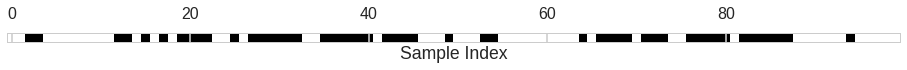

In [66]:
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample Index")
plt.yticks(())

In [70]:
sp.fit(X,y)
x_sp_selected = sp.transform(X)
result = cross_val_score(model, x_sp_selected, y, cv=kfold, scoring='r2')
print(result.mean())

0.507519713599


## PCA

In [63]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X, y)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [64]:
pca.explained_variance_ratio_

array([  7.89671699e-01,   1.94700356e-01,   6.13912829e-03,
         3.58158770e-03,   1.95368877e-03,   1.47938054e-03,
         6.54074668e-04,   5.16928854e-04,   4.30335813e-04,
         2.75255672e-04,   1.83199729e-04,   1.61085416e-04,
         9.10394535e-05,   6.17357491e-05,   4.58582503e-05,
         2.89096342e-05,   2.06367609e-05,   4.44721009e-06,
         3.31999382e-07,   1.28446322e-07,   9.07934321e-08,
         4.35928574e-08,   2.51169230e-08,   6.63034155e-09,
         4.49295282e-09,   3.05324224e-09,   2.99959611e-09,
         2.34485970e-09,   2.10766736e-09,   1.82965524e-09,
         1.33966347e-09,   1.10293802e-09,   8.37116714e-10,
         7.83357503e-10,   6.04661247e-10,   4.88750799e-10,
         4.28126794e-10,   3.91490318e-10,   3.01266072e-10,
         2.90453134e-10,   2.41645214e-10,   2.16320077e-10,
         1.78292417e-10,   1.63481483e-10,   1.55172647e-10,
         1.30883285e-10,   1.05326739e-10,   9.40635195e-11,
         8.95793271e-11,

In [65]:
# pca transform data before fitting
rX_pca = pca.transform(X)

In [67]:
lr = Lasso(alpha=4)

lr.fit(rX_pca, y)

Lasso(alpha=4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
display(lr.coef_)

display((lr.coef_ > 0).sum())

array([  1.07336514e-03,  -5.15721975e-03,  -1.26097343e-02,
        -1.29767609e-02,  -3.03260993e-02,   6.51000011e-02,
         1.82035595e-02,   2.14477246e-02,  -2.08916131e-02,
         4.49354223e-02,   6.26565935e-02,   5.89790121e-02,
         2.17988615e-01,   8.18346664e-03,  -5.87310010e-03,
         1.41416364e-01,  -2.94705314e-01,   7.46261573e-01,
        -1.85633779e-01,   1.86088716e+00,  -1.96840329e-01,
        -4.48060410e-01,  -8.82983271e-01,   8.64911149e+00,
         7.43140940e+00,   2.25088070e+00,   1.87395839e+01,
         8.79074802e+00,   1.66697448e+01,   2.94633720e+01,
        -1.12403548e+01,  -2.43535474e+01,   1.84498008e+00,
        -3.96278080e+00,  -1.15035160e+01,  -3.67097929e+01,
        -8.67187249e+00,  -3.83507125e+01,  -6.83584575e+00,
         7.53747589e+00,  -3.35159322e+01,   1.13622157e+01,
         1.33929268e+01,   1.26327875e+00,  -3.05925282e+01,
        -1.67471355e+01,   2.94914214e+01,   6.96267359e-01,
        -2.21172262e+01,

52

In [69]:
component_betas = list(zip(list(range(0,20)),lr.coef_))
component_betas.sort(key=lambda x: abs(x[1]), reverse=True)
component_betas

[(19, 1.8608871560086586),
 (17, 0.74626157250752079),
 (16, -0.29470531414001566),
 (12, 0.21798861511024203),
 (18, -0.18563377940891479),
 (15, 0.14141636406234684),
 (5, 0.065100001125290824),
 (10, 0.06265659347059041),
 (11, 0.058979012085137172),
 (9, 0.044935422315748798),
 (4, -0.030326099322274515),
 (7, 0.021447724580792915),
 (8, -0.020891613074455362),
 (6, 0.018203559529311703),
 (3, -0.012976760949462818),
 (2, -0.01260973426313342),
 (13, 0.0081834666384086319),
 (14, -0.0058731001029892413),
 (1, -0.005157219745728958),
 (0, 0.0010733651356832133)]

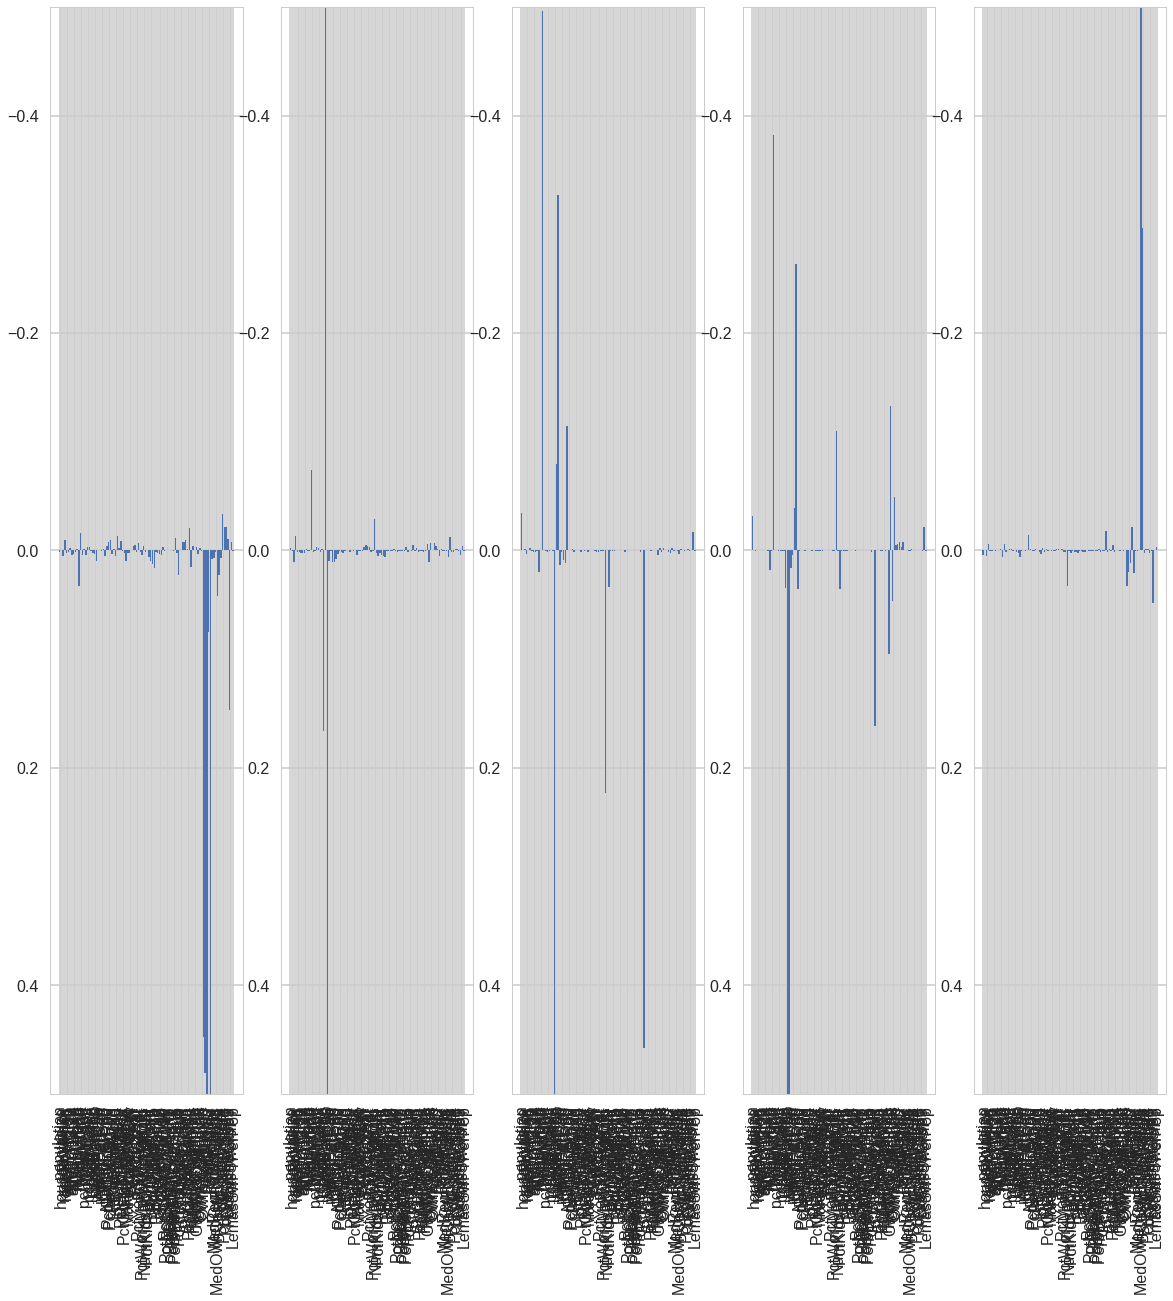

In [71]:
fig = plt.figure(figsize=(20,20))
for i, component in enumerate(pca.components_[[19,17,16,12,18]]):
    fig.add_subplot(151+i)
    plt.bar(list(range(100)), component)
    plt.xticks(list(range(100)), data[:100].columns, rotation=90)
    plt.ylim(.5,-.5)

In [72]:
pca_results = list(zip(data[:100].columns,
                       np.sum(abs(pca.components_[[19,17,16,12,18]]),
                              axis=0)))

In [73]:
pca_results.sort(key=lambda x: abs(x[1]), reverse=True)
pca_results

[('whitePerCap', 1.58316986517317),
 ('perCapInc', 1.3997817410322324),
 ('MedOwnCostPctIncNoMtg', 1.0027020338672368),
 ('medIncome', 0.97453776593251129),
 ('medFamInc', 0.80825977810024496),
 ('MedNumBR', 0.65000274305574568),
 ('RentMedian', 0.54471954164614222),
 ('RentQrange', 0.54132412461087653),
 ('RentLowQ', 0.51134086458649763),
 ('OwnOccQrange', 0.49363328697497466),
 ('PctWorkMom', 0.39876220127451417),
 ('NumInShelters', 0.33450497851380145),
 ('OtherPerCap', 0.28792633818430557),
 ('PctSameState85', 0.20043391493091389),
 ('HispPerCap', 0.17712286726827997),
 ('OwnOccLowQuart', 0.14891133517375979),
 ('PctWOFullPlumb', 0.10819056374170508),
 ('RentHighQ', 0.10696797718467187),
 ('PctKidsBornNeverMar', 0.075730754600520464),
 ('population', 0.073686663220664),
 ('AsianPerCap', 0.058970548570506487),
 ('OwnOccMedVal', 0.057182672666655998),
 ('OwnOccHiQuart', 0.052762575476579067),
 ('LemasSwornFT', 0.050687862877872414),
 ('numbUrban', 0.041534772685807776),
 ('pctUrban',

## 5. Plotting a diagonal correlation matrix

In [74]:
sns.set(style="white")

# Compute the correlation matrix
corr = clean.corr()

In [76]:
clean.shape

(2118, 112)

In [75]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

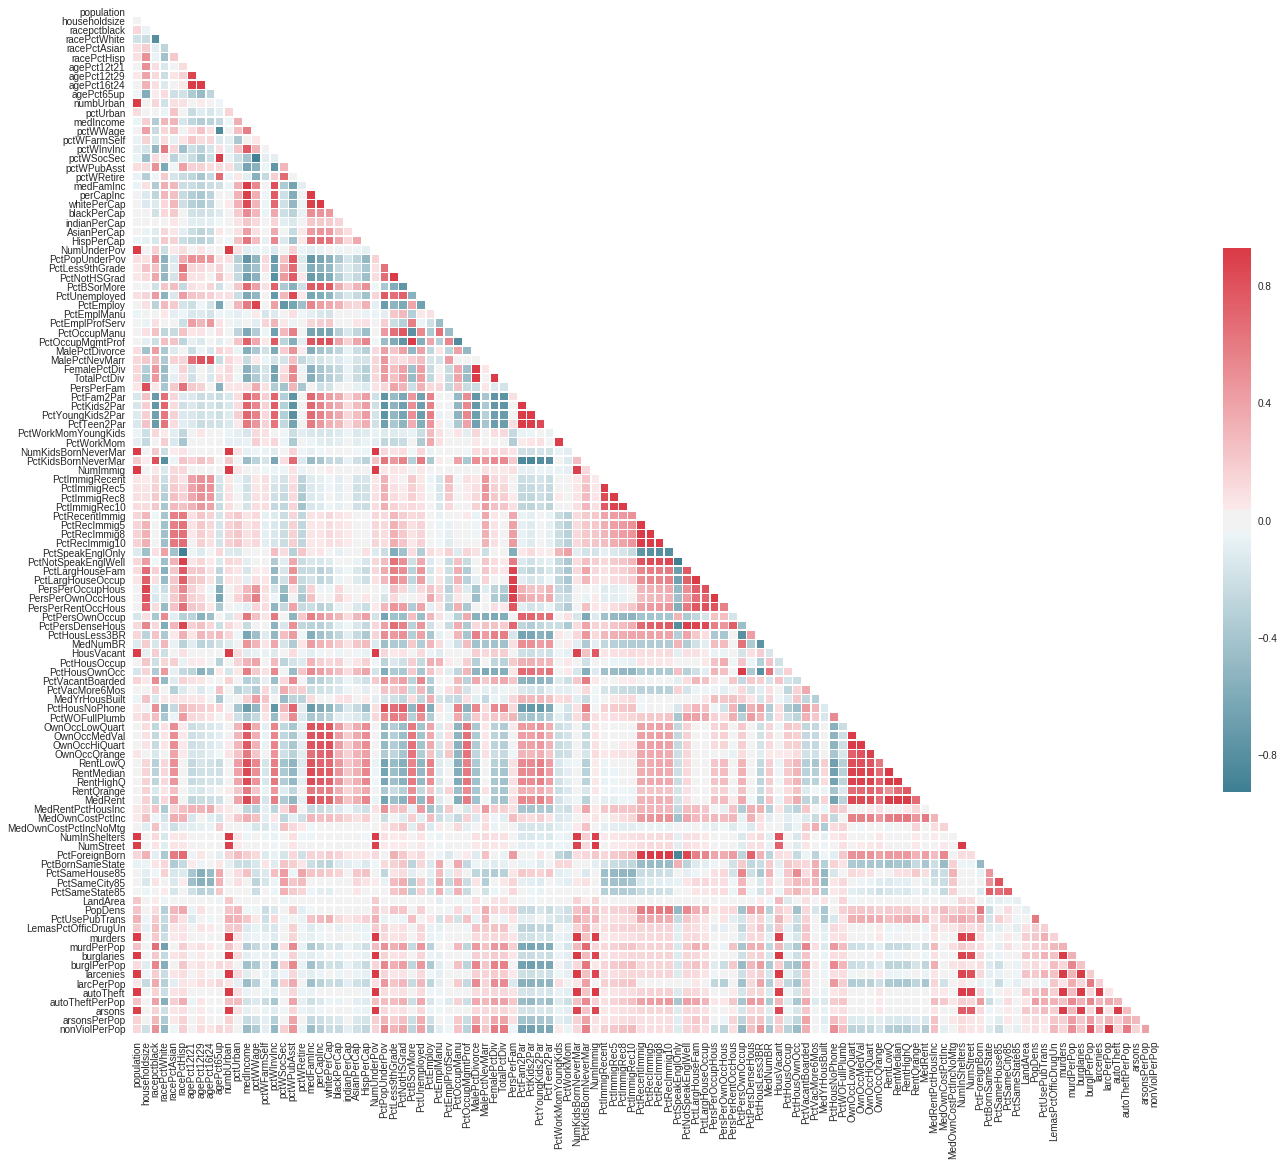

In [81]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(23, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [143]:
unclean = []
for col in clean.columns:
    if clean[col].dtypes == np.dtype('int64'):
        clean[col].values.astype(np.float64, copy=False)
        unclean.append(col)
print(unclean)
clean.population.dtypes != np.dtype('int64')

['population', 'numbUrban', 'medIncome', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'HispPerCap', 'NumUnderPov', 'NumKidsBornNeverMar', 'NumImmig', 'MedNumBR', 'HousVacant', 'MedYrHousBuilt', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'OwnOccQrange', 'RentLowQ', 'RentMedian', 'RentHighQ', 'RentQrange', 'MedRent', 'NumInShelters', 'NumStreet', 'murders']


False

In [153]:
for i, val in clean.loc[0,:].iteritems():
    if val == 5117.28:
        print(i, val)

In [152]:
X.astype(np.float64).dtype

dtype('float64')

In [87]:
y.dtype

dtype('float64')